<a href="https://colab.research.google.com/github/yoheshkannan/ML/blob/master/WBC_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# White Blood Cell Classification
To develop an automatic classification system that applies to the leukocytes classification system. we classifiy WBC cells into different categories as follows:


*   EOSINOPHIL
*   LYMPHOCYTE
*   MONOCYTE
*   NEUTROPHIL







In [1]:
# upload authentication key file to load data from kaggle
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# dounload the data from kaggle
!kaggle datasets download -d alifrahman/main-dataset

 97% 97.0M/99.5M [00:05<00:00, 11.4MB/s]
100% 99.5M/99.5M [00:05<00:00, 19.4MB/s]


In [9]:
# unzip the data
from zipfile import ZipFile
file_name = 'main-dataset.zip'

with ZipFile(file_name , 'r') as zip:
  zip.extractall()
  print('Done')

Done


 Data Visualization

In [10]:
# import necessary libraries
import matplotlib.pyplot as plt
import os
import cv2

In [149]:
# a function to visualize all 4 classes images of training data
labels = ['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL']
def plot_img(path,n):
  for label in labels:
    img_path = os.path.join(path,label)
    x = os.listdir(img_path)
    plt.figure(figsize=(10,10))
    for i in range(n):
      plt.subplot(4,n,i+1)
      path_new = ''
      path_new = os.path.join(img_path,x[i])
      image = plt.imread(path_new)
      plt.imshow(image)
      plt.title(label)
      plt.axis('off')
    plt.show()


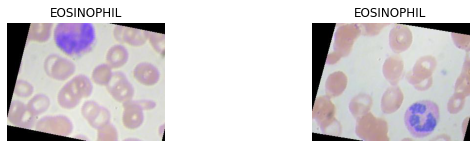

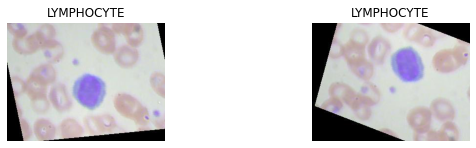

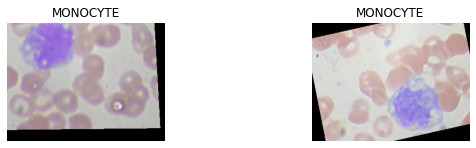

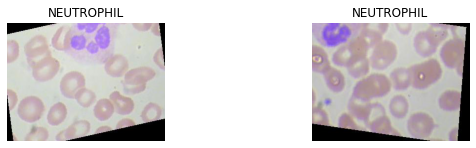

In [150]:
# visualize two images from each category in train data
plot_img('/content/main_dataset/train/',2)

In [201]:
# A function to check for distribution of each class
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def check_imbalance(path,title):
  data = []
  for label in  labels:
    img_path = os.path.join(path,label)
    x = os.listdir(img_path)
    count = len(x) 
    data.append([label,count])
  df = pd.DataFrame(data, columns=['Class','Count'])
  df['Class']= df['Class'].astype('category')
  print(df)
  sns.barplot(x='Class',y='Count',data=df)
  plt.title(title)
  plt.show()

        Class  Count
0  EOSINOPHIL   2497
1  LYMPHOCYTE   2483
2    MONOCYTE   2478
3  NEUTROPHIL   2499


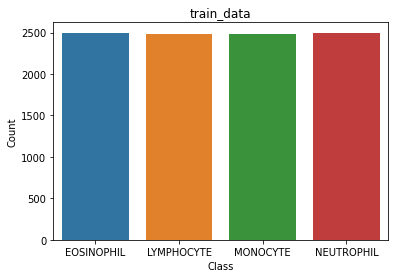

In [202]:
# check distribution for each class on train_data
check_imbalance(path='/content/main_dataset/train',title='train_data')

        Class  Count
0  EOSINOPHIL    473
1  LYMPHOCYTE    470
2    MONOCYTE    470
3  NEUTROPHIL    474


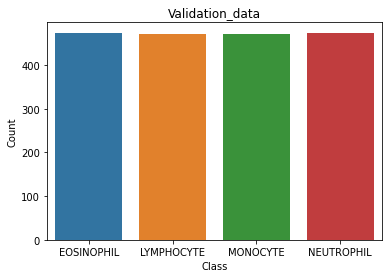

In [203]:
# check distribution for each class on validation_data
check_imbalance(path='/content/main_dataset/validation',title='Validation_data')

        Class  Count
0  EOSINOPHIL    150
1  LYMPHOCYTE    150
2    MONOCYTE    150
3  NEUTROPHIL    150


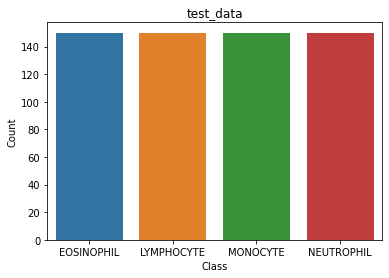

In [204]:
# check distribution for each class on test_data
check_imbalance(path='/content/main_dataset/test',title='test_data')

Data Augmentation:

Image data augementation is used to expand the training dataset inorder to improve the performance and ability of the model to generalize.

In [13]:
# Import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

In [14]:
#create image data augmentation generator for train set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range =0.3,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [15]:
#create image data augmentation generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# Image Data generator flow_from_directory (train_data)
train_data = train_datagen.flow_from_directory('/content/main_dataset/train/', #directory
                                               target_size=(150,150), #resize the image (150,150)
                                               batch_size = 32, #no.of.images to extract from folder for every batch
                                               class_mode = 'categorical')

Found 9957 images belonging to 4 classes.


In [17]:
# Image Data generator flow_from_directory (valid_data)
valid_data = test_datagen.flow_from_directory('/content/main_dataset/validation/',
                                              target_size=(150,150),
                                              batch_size = 32,
                                              class_mode = 'categorical')

Found 1887 images belonging to 4 classes.


In [18]:
# Image Data generator flow_from_directory (test_data)
test_data = test_datagen.flow_from_directory('/content/main_dataset/test/',
                                             target_size=(150,150),
                                             batch_size =600,
                                             class_mode = 'categorical')

Found 600 images belonging to 4 classes.


# Define CNN Model

In [126]:
# import libraries
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [127]:
# initialize sequential model and add required layers
model = Sequential()
model.add(BatchNormalization(input_shape=(150,150,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [128]:
model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [129]:
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [130]:
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [131]:
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [132]:
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [133]:
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(4))
model.add(Activation('softmax'))

In [134]:
# compile a model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# summary of a model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 150, 150, 3)       12        
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
activation_55 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
activation_56 (Activation)   (None, 75, 75, 32)       

 Fitting a Model

In [135]:
# fit a model
hist = model.fit(train_data, epochs =25, batch_size=64,validation_data= valid_data,
                 callbacks = [EarlyStopping(monitor='val_accuracy',patience=10),
                              ModelCheckpoint("best.model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')])

Epoch 1/25
312/312 [==============================] - ETA: 0s - loss: 1.3147 - accuracy: 0.3699
Epoch 00001: val_accuracy improved from -inf to 0.33227, saving model to best.model.hdf5
312/312 [==============================] - 63s 202ms/step - loss: 1.3147 - accuracy: 0.3699 - val_loss: 1.3657 - val_accuracy: 0.3323
Epoch 2/25
312/312 [==============================] - ETA: 0s - loss: 0.8208 - accuracy: 0.6517
Epoch 00002: val_accuracy improved from 0.33227 to 0.78272, saving model to best.model.hdf5
312/312 [==============================] - 63s 202ms/step - loss: 0.8208 - accuracy: 0.6517 - val_loss: 0.5594 - val_accuracy: 0.7827
Epoch 3/25
312/312 [==============================] - ETA: 0s - loss: 0.4415 - accuracy: 0.8366
Epoch 00003: val_accuracy improved from 0.78272 to 0.85745, saving model to best.model.hdf5
312/312 [==============================] - 63s 202ms/step - loss: 0.4415 - accuracy: 0.8366 - val_loss: 0.5263 - val_accuracy: 0.8574
Epoch 4/25
312/312 [=================

 Evaluating a Model

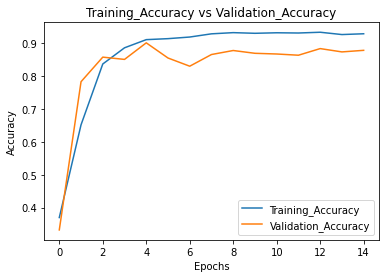

In [136]:
# plot training accuracy vs validation accuracy
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_Accuracy','Validation_Accuracy'])
plt.title('Training_Accuracy vs Validation_Accuracy')
plt.show()

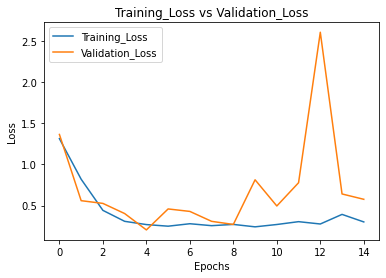

In [137]:
# plot training loss vs validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training_Loss','Validation_Loss'])
plt.title('Training_Loss vs Validation_Loss')
plt.show()

In [138]:
# load the best model
final_model = load_model('best.model.hdf5')

In [139]:
# find the best model's loss and accuracy
loss,acc = final_model.evaluate(test_data)
print('Model Loss:', loss)
print('Model Accuracy:',acc)

1/1 [==============================] - 0s 1ms/step - loss: 0.1652 - accuracy: 0.9233
Model Loss: 0.16518740355968475
Model Accuracy: 0.9233333468437195


 Prediction

In [140]:
# split image and labels from test data
test_img, test_labels = next(test_data)

In [141]:
# identify the actual class of test_data
import numpy as np
test_class = np.argmax(test_labels, axis=-1)

In [152]:
test_class[0:10]

array([0, 1, 2, 3, 2, 2, 3, 3, 1, 0])

In [142]:
# prediction
pred =final_model.predict(test_data,steps=1,verbose=0)

In [154]:
pred[0:10]

array([[1.5074959e-01, 2.5546806e-02, 1.2265781e-01, 7.0104581e-01],
       [4.0555824e-35, 1.0000000e+00, 5.4320873e-19, 2.3642502e-25],
       [3.8252119e-02, 4.6476594e-04, 8.6868308e-02, 8.7441486e-01],
       [1.4591026e-10, 6.7051913e-29, 5.5537968e-14, 1.0000000e+00],
       [2.0338721e-31, 9.6638156e-19, 1.0000000e+00, 1.1323274e-15],
       [1.2124285e-18, 9.6189064e-12, 1.0000000e+00, 2.6178064e-09],
       [8.2782120e-01, 9.0286914e-05, 2.0084559e-05, 1.7206836e-01],
       [8.6778819e-05, 5.5807821e-13, 4.8120442e-06, 9.9990845e-01],
       [2.8947434e-23, 1.0000000e+00, 5.0034326e-12, 1.9755184e-17],
       [9.9975461e-01, 1.3986502e-10, 2.8358031e-14, 2.4543452e-04]],
      dtype=float32)

In [143]:
# To identify the predicted class of test_data
prediction = np.argmax(pred, axis=-1)

In [153]:
prediction[0:10]

array([3, 1, 3, 3, 2, 2, 0, 3, 1, 0])

In [144]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true = test_class, y_pred=prediction)

In [145]:
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp

In [146]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[132   0   0  18]
 [  0 150   0   0]
 [  0   0 141   9]
 [ 11   1   7 131]]


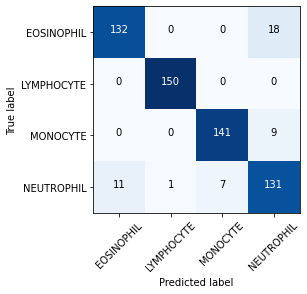

In [147]:
# confusion matrix of predicted test_data
cm_plot_labels = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']
plot_confusion_matrix(cm=conf, classes=cm_plot_labels, title='')

In [151]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_true = test_class, y_pred = prediction))
# we developed a model of 92% accuracy to classify WBC

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       150
           1       0.99      1.00      1.00       150
           2       0.95      0.94      0.95       150
           3       0.83      0.87      0.85       150

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [155]:
correct = np.nonzero(prediction == test_class)[0]
incorrect = np.nonzero(prediction != test_class)[0]

Some of the correctly predicted classes

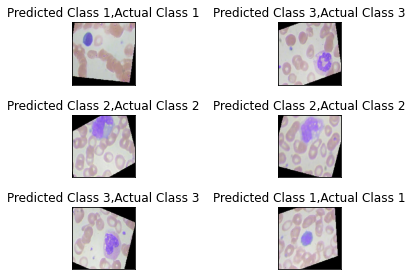

In [165]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_img[c])
    plt.title("Predicted Class {},Actual Class {}".format(prediction[c], test_class[c]))
    plt.tight_layout()
    i += 1

Some of the incorrectly predicted classes

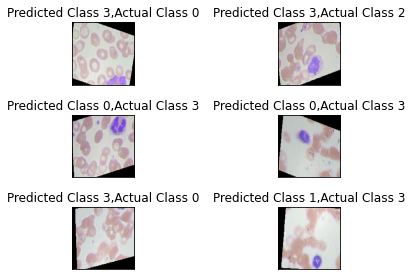

In [166]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_img[c])
    plt.title("Predicted Class {},Actual Class {}".format(prediction[c], test_class[c]))
    plt.tight_layout()
    i += 1